## Assignement 1

1. The data-sheet fo the JL-55-23 specifies different RX sensitivity levels for different data rates. Additionally, assume that for the correct decoding of the lowest modulation and coding scheme (MCS) a SNR of 0dB is required. What is the maximum allowed receiver noise figure at room temperature (T = 300K) for the given system?

In [1]:
Kᵦ = 1.38e-23; @show Kᵦ # Boltzmann constant
Tₑ = 300; @show Tₑ; # Average Room Temperature [290 ~ 300k]  Kelvin 

Kᵦ = 1.38e-23
Tₑ = 300


In [2]:
# 10 * log10( 1.38e-23 * 300 ) + 30
N₀ = 10 * log10( Kᵦ * Tₑ ) + 30; @show round( N₀ , digits = 0); # Termal Noise -174 dBm 

round(N₀, digits = 0) = -174.0


In [3]:
B = 10 * log10(40e6); # B Bandwidth

In [4]:
SNR = 0; @show SNR; # dB

SNR = 0


In [5]:
Pₙ = N₀ + B; @show round( Pₙ , digits = 1); # Total Rx Noise = -174 dBm + 10log(B) in dB

round(Pₙ, digits = 1) = -97.8


In [6]:
Rₓₛ =  -97; # MIMO Data Rates & RX-sensitivity (lowest MCS [0 - 15 Mbps] value -97 dB

Supported Link rates: in Datasheet JLG-55-23.pdf

<table border="1">
    <tr>
        <th>MIMO Data Rates &amp; RX-sensitivity</th>
    </tr>
    <tr>
        <td>MCS 15 – 300 Mbps</td>
        <td>-74 dBm</td>
    </tr>
    <tr>
        <td>MCS 14 – 270 Mbps</td>
        <td>-76 dBm</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
    </tr>
    <tr>
        <td>MCS 1 - 30 Mbps</td>
        <td>-94 dBm</td>
    </tr>
    <tr>
        <td>MCS 0 - 15 Mbps</td>
        <td>-97 dBm</td>
    </tr>
</table>


In [7]:
# Rx Sensitivity 
# Rₓ = N₀ + F + B + SNR  # Pn (dbM) + F (dB) + B (dB) + SNR (dB)

In [8]:
Rᵥ =  N₀ + B + SNR 

-97.80939667551138

In [9]:
F = Rₓₛ - Rᵥ # In dB

0.8093966755113797

In [10]:
10^(F/10) # In linear

1.2048685476865195

2. Plot the measurement data (RSSI vs distance) for both polarizations. Try to explain where the difference between the two polarizations comes from!


In [11]:
## Receive the signal
include("./data/rssi.jl");

In [52]:
# Vectorize the Matlab's data to Julia's format
d₁, rₛₛₛᵢ¹ = vec(d1), vec(rssi1);
d₂, rₛₛₛᵢ² = vec(d2), vec(rssi2);

In [53]:
using Plots

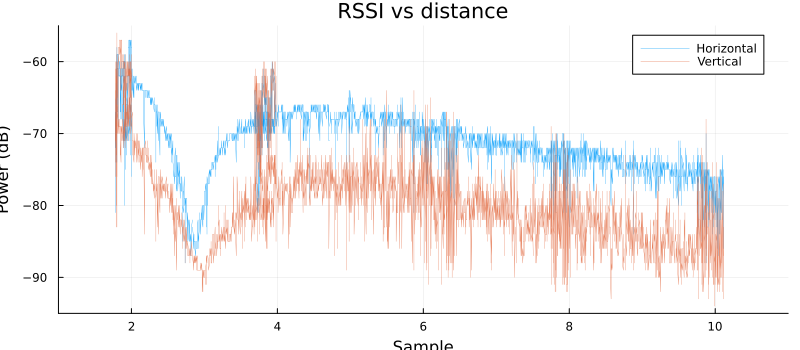

In [76]:
plt = plot( d₁, rₛₛₛᵢ¹, label = "Horizontal", linewidth = .3)
plt = plot!(d₂, rₛₛₛᵢ², label = "Vertical", linewidth = .3)
plot(plt
    , xlabel="Sample", ylabel="Power (dB)", title="RSSI vs distance"
    , size = (800,350)
    , legend = :topright
    , xlim=(1, 11), ylim=(-95, -55)
    , grid = :true
)

3. Take the two-path model without the large distance approximation (Equation (4.55) from the Appendix), and compute the received signal strength according to $P_{Rx}(d) = |E_{tot}(d)|^2A_e$, where $A_e$ is the receive antenna aperture, which is related to the receive
antenna gain by $G_{R_x} = \frac{4}{\pi}A_e$ . Further use $|E(d)|^2 = \frac{P_{Tx}G_{Tx}}{4\pi d^2}$ to compute the power density at $1m$. Implement this as a function in Matlab.

The magnitude of the field strength can thus be written as

$$|E_{tot}(d)| = E(1m) \frac{1}{d|m} \sqrt{(1 − \cos(\Delta \phi))^2 + \sin^2(\Delta \phi)  }$$

In [77]:
# In the Javelin – Radio Link System DataSheet
# System Highlights
# Up to 23 dBm aggregated TX-power for long range capability
Gtx = 23; 

In [78]:
GRx = 12; # Model ANT4958Q12VH  Gain 2x12dBi

In [79]:
Ptx = 23; # Up to 23 dBm aggregated TX-power for long range capability 

# Background

RSSI, which stands for Received Signal Strength Indicator, is a measure of the power present in a received radio signal. It's commonly used in wireless communication systems, including Wi-Fi and cellular networks, to estimate the signal quality and link reliability. The relationship between RSSI and distance is an important concept in wireless communications for network planning, signal optimization, and determining the range of wireless coverage.

### RSSI and Distance Relationship

1. **Inverse Proportionality**: Generally, RSSI values are inversely proportional to the distance between the transmitter and the receiver. This means as the distance increases, the RSSI value (which is often expressed in negative dBm units) decreases in magnitude. For example, moving away from a Wi-Fi router results in a lower RSSI value, indicating weaker signal strength.

2. **Log-Distance Path Loss Model**: A commonly used model to describe the relationship between RSSI and distance is the log-distance path loss model. This model considers the signal loss over distance and is expressed mathematically as:

   $\text{PL(dB)} = \text{PL(d0)} + 10 \cdot n \cdot \log_{10}\left(\frac{d}{d0}\right) + X_\sigma$

   where:
   - $\text{PL(dB)}$ is the path loss in dB,
   - $\text{PL(d0)}$ is the path loss at a reference distance \(d0\),
   - $n$ is the path loss exponent that indicates how fast the signal decays with distance,
   - $d$ is the distance from the transmitter,
   - $d0$ is a reference distance from the transmitter,
   - $X_\sigma$ is a Gaussian random variable representing shadowing effects (with mean 0 and standard deviation $\sigma$).

3. **Environmental Factors**: The actual relationship between RSSI and distance can be significantly affected by environmental factors, including physical obstructions (like walls and buildings), signal reflections, diffraction, and absorption. These factors can lead to multipath propagation and fading, which can cause fluctuations in the RSSI values independent of distance.

4. **Signal Frequency**: The frequency of the signal also affects the RSSI-distance relationship. Higher frequency signals tend to have higher path loss and are more susceptible to obstructions compared to lower frequency signals.

### Practical Implications

Understanding the relationship between RSSI and distance is crucial for:
- **Network Design**: Optimizing the placement of access points and base stations to ensure adequate coverage.
- **Location Estimation**: Using RSSI values from multiple sources to estimate the position of a device in indoor positioning systems.
- **Troubleshooting**: Identifying areas of poor signal coverage in a network.

In practice, measuring RSSI can provide a quick estimate of signal quality, but for precise distance measurements or to fully understand signal coverage, additional metrics and site-specific factors should be considered.

- [ ] [Plotting in Matlab]()

```matlab
>> plot(d1,rssi1)
>> hold on
>> plot(d2,rssi2)
>> legend
>> legend('horizontal','vertical')
```


<img src=images/rssi12_plots.png width='75%' height='75%' > </img>

### Rules of thumb

$P_{watt} = 10 log_{10} \big( \frac{P_{watt}}{1_{watt}} \big)$ # dB

$P_{watt} = 10 log_{10} \big( \frac{P_{watt}}{1m_{watt}} \big)$ # dBm

$P_{dBm} = P_{dB} + 30$

$
1_m{watt} = 0 dBm
  \begin{cases}
    \text{add} \; 3dB      & \quad \text{ everytime } \text{ power is doubled }\\
    \text{add} \; 10dB     & \quad \text{ everytime } \text{ power is increased x10 }
  \end{cases}
$

<img src=images/task4.png width='100%' height='100%' > </img>